<a href="https://colab.research.google.com/github/jihansand/StudyCase-Eksplorasi-Visualisasi-Data/blob/main/Project_1_EDA_Kelompok_G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT 1 EDA**

Kelompok G:
* Esly Vani               (2106700782)
* Jihan Sandrina          (2106708160)
* Mufid Asshiddiq         (1906387354)
* Titania Puteri Samudera (2106654246)
* Vesya Padmadewi         (2106726926)

## Data Penggunaan Energi Gedung

Sumber:
* https://www.kaggle.com/c/ashrae-energy-prediction/data

Keterangan:

DG = Data Gedung

DTr = Data Train

DCTr = Data Weather Train

#**Persiapan**

In [ ]:
# Mengimport modul dan menginisialisasi modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #untuk membuat plot
import seaborn as sns #untuk membuat plot

In [ ]:
#import dataset
dg = pd.read_csv('/content/building_metadata.csv', sep = ',')
train = pd.read_csv('/content/train.csv', sep=',')
test = pd.read_csv('/content/test.csv', sep =',')
w_train = pd.read_csv('/content/weather_train.csv', sep=',')
w_test = pd.read_csv('/content/weather_test.csv', sep=',')

#**Melihat Ringkasan Data**

**Building Metadata**

In [ ]:
dg.info() #melihat info data gedung

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [ ]:
dg.shape

(1449, 6)

In [ ]:
# Statistika Deskriptif Building Metadata
dg.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


In [ ]:
# Building Metadata (DG) Overview
dg.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
# Building Metadata (DG) Missing Value Check and Sum
dg.isna().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [ ]:
# Site ID Data Frequencies
dg['site_id'].value_counts(sort=False)

0     105
1      51
2     135
3     274
4      91
5      89
6      44
7      15
8      70
9     124
10     30
11      5
12     36
13    154
14    102
15    124
Name: site_id, dtype: int64

^^ Terlihat bahwa satu site_id berisi beberapa gedung ^^

In [ ]:
# Building ID Data Frequencies
dg['building_id'].value_counts(sort=False)

0       1
1       1
2       1
3       1
4       1
       ..
1444    1
1445    1
1446    1
1447    1
1448    1
Name: building_id, Length: 1449, dtype: int64

In [ ]:
# Primary Use Data Frequencies
dg['primary_use'].value_counts(sort=False)

Education                        549
Lodging/residential              147
Office                           279
Entertainment/public assembly    184
Other                             25
Retail                            11
Parking                           22
Public services                  156
Warehouse/storage                 13
Food sales and service             5
Religious worship                  3
Healthcare                        23
Utility                            4
Technology/science                 6
Manufacturing/industrial          12
Services                          10
Name: primary_use, dtype: int64

**Weather Train**

In [ ]:
w_train.shape

(139773, 9)

In [ ]:
w_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [ ]:
# Statistika Deskriptif Weather Train
w_train.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


In [ ]:
# Weather Train Preview
w_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [ ]:
# Weather Train (DCTr) Missing Value Check and Sum
w_train.isna().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

**Train**

In [ ]:
train.shape

(1048575, 4)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   building_id    1048575 non-null  int64  
 1   meter          1048575 non-null  int64  
 2   timestamp      1048575 non-null  object 
 3   meter_reading  1048575 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 32.0+ MB


In [ ]:
# Statistika Deskriptif Train
train.describe()

,building_id,meter,meter_reading
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,8.135641e+02,6.584574e-01,1.332728e+03
std,4.264461e+02,9.343969e-01,6.468032e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.130000e+02,0.000000e+00,1.294000e+01
50%,9.080000e+02,0.000000e+00,6.465000e+01
75%,1.197000e+03,1.000000e+00,2.270000e+02
max,1.448000e+03,3.000000e+00,8.243400e+06


In [ ]:
# Train Preview
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
# Train Missing Value Check
train.isna().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

Sehingga didapat informasi pada data-data adalah:

1.   building_id: Daftar ID gedung (1430 gedung)
2.   site_id: Daftar ID lokasi gedung (16 lokasi)
3. meter: Jenis meter(energi) yang digunakan pada gedung (Electricity, ChilledWater, Steam, HotWater)
4. meter_reading: Jumlah penggunaan energi
5. timestamp: Waktu saat pengukuran data (jam)
6. primary_use: Aktivitas yang dilakukan di gedung (16 jenis)
7. square_feet: Luas bangunan gedung
8. year_built: Tahun pembangunan gedung
9.  floor_count: Jumlah lantai pada gedung
10. air_temperature: Suhu udara
11. cloud_coverage: Ukuran langit yang berawan
12. dew_temperature: Udara berembun
13. precip_depth_1_hr : presipitasi (banyaknya air dari langit)
13. sea_level_pressure: Tekanan atmosfer
14. wind_direction: Arah angin
15. wind_speed: Kecepatan angin



# **Preprocessing**

**MERGING DATA**

Menggabungkan data gedung dan data train dengan mencocokannya pada variabel building_id, site_id, dan timestamp.

*Data Train*

In [ ]:
# Dtrain adalah data gabungan data gedung dan data train
Dtrain = train.merge(dg, on = "building_id", how = "left")

In [ ]:
# Memisah Observasi Site 0 untuk Konversi Nilai 'meter_reading'
data = Dtrain[Dtrain['site_id']==0]

In [ ]:
# Konversi nilai 'meter_reading' untuk Site 0 dengan Perkalian Skalar (0.2931)
data.loc[:, 'meter_reading'] *= 0.2931

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
# Menyimpan Observasi Site 0 pada DataFrame Utama

#Menghapus observasi Site 0 yang Lama
Dtrain = Dtrain[Dtrain.site_id != 0]

#Melakukan Konkatonasi antara Observasi Site 0 yang Dikonversi dengan newDTr
Dtrain = pd.concat([data,Dtrain], join = "outer", ignore_index=True)
Dtrain.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN


*Data Weather Train*

In [ ]:
#D2train adalah data gabungan Dtrain dan data weather train
D2train = Dtrain.merge(w_train, on = ["site_id", "timestamp"], how='left')

**MENELUSURI DATA**

In [ ]:
# Melihat info data yang telah dimerging
D2train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   building_id         1048575 non-null  int64  
 1   meter               1048575 non-null  int64  
 2   timestamp           1048575 non-null  object 
 3   meter_reading       1048575 non-null  float64
 4   site_id             1048575 non-null  int64  
 5   primary_use         1048575 non-null  object 
 6   square_feet         1048575 non-null  int64  
 7   year_built          422602 non-null   float64
 8   floor_count         182047 non-null   float64
 9   air_temperature     1026132 non-null  float64
 10  cloud_coverage      533010 non-null   float64
 11  dew_temperature     1026079 non-null  float64
 12  precip_depth_1_hr   854878 non-null   float64
 13  sea_level_pressure  937636 non-null   float64
 14  wind_direction      980637 non-null   float64
 15  wind_speed     

In [ ]:
D2train.shape

(1048575, 16)

In [ ]:
# Mengecek data-data yang harusnya termasuk kategorik
jenis_site = D2train['site_id'].unique()
print('Daftar site_id adalah \n {0} \n sebanyak {1} lokasi'.format(jenis_site, len(jenis_site)))
print('-')

banyak_gedung = D2train['building_id'].unique()
print('Daftar nomor gedung adalah \n {0} \n sebanyak {1} gedung'.format(banyak_gedung, len(banyak_gedung)))
print('-')

jenis_meter = D2train['meter'].unique()
print('Jenis meter yang digunakan adalah \n {0} \n sebanyak {1} jenis'.format(jenis_meter, len(jenis_meter)))

Daftar site_id adalah 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 
 sebanyak 16 lokasi
-
Daftar nomor gedung adalah 
 [   0    1    2 ...  300  839 1028] 
 sebanyak 1430 gedung
-
Jenis meter yang digunakan adalah 
 [0 3 1 2] 
 sebanyak 4 jenis


In [ ]:
#mengubah jenis data dari float atau integer menjadi category
D2train['site_id'] = D2train['site_id'].astype('category')
D2train['building_id'] = D2train['building_id'].astype('category')
D2train['meter'] = D2train['meter'].astype('category')
D2train['year_built'] = D2train['year_built'].astype('category')
D2train['primary_use'] = D2train['primary_use'].astype('category')
D2train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   building_id         1048575 non-null  category
 1   meter               1048575 non-null  category
 2   timestamp           1048575 non-null  object  
 3   meter_reading       1048575 non-null  float64 
 4   site_id             1048575 non-null  category
 5   primary_use         1048575 non-null  category
 6   square_feet         1048575 non-null  int64   
 7   year_built          422602 non-null   category
 8   floor_count         182047 non-null   float64 
 9   air_temperature     1026132 non-null  float64 
 10  cloud_coverage      533010 non-null   float64 
 11  dew_temperature     1026079 non-null  float64 
 12  precip_depth_1_hr   854878 non-null   float64 
 13  sea_level_pressure  937636 non-null   float64 
 14  wind_direction      980637 non-null   float64 
 15

In [ ]:
#mengubah timestamp dari data per jam menjadi data harian
D2train["timestamp"] = pd.to_datetime(D2train["timestamp"], format='%Y-%m-%d %H:%M:%S')
D2train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [ ]:
#membuktikan bahwa tiap gedung hanya berada di satu site
for b in D2train.building_id.unique():
    if D2train[D2train.building_id == b].site_id.nunique()>1:
      print(D2train[D2train.building_id == b].site_id.nunique())

#karena tidak keluar hasil, maka terbukti tiap gedung berada di satu dite_id

In [ ]:
D2train.describe()

,meter_reading,square_feet,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1.048575e+06,1.048575e+06,182047.000000,1.026132e+06,533010.000000,1.026079e+06,854878.000000,937636.000000,980637.000000,1.024586e+06
mean,1.332694e+03,1.079391e+05,4.194027,3.225468e+00,1.769138,-2.679109e+00,0.564369,1016.966410,183.298737,3.494426e+00
std,6.468032e+04,1.170413e+05,4.009517,9.524387e+00,2.591556,9.687170e+00,5.134044,9.286851,119.370288,2.432883e+00
min,0.000000e+00,2.830000e+02,1.000000,-2.560000e+01,0.000000,-2.940000e+01,-1.000000,974.400000,0.000000,0.000000e+00
25%,1.290000e+01,3.276600e+04,1.000000,-2.800000e+00,0.000000,-9.000000e+00,0.000000,1011.800000,80.000000,2.100000e+00
50%,6.460000e+01,7.280000e+04,3.000000,5.000000e+00,0.000000,-1.100000e+00,0.000000,1018.100000,190.000000,3.100000e+00
75%,2.270000e+02,1.400920e+05,6.000000,1.000000e+01,2.000000,3.900000e+00,0.000000,1022.400000,290.000000,5.100000e+00
max,8.243400e+06,8.750000e+05,26.000000,2.830000e+01,9.000000,2.110000e+01,165.000000,1039.000000,360.000000,1.400000e+01


In [ ]:
D2train.set_index('meter')

,building_id,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter,,,,,,,,,,,,,,,
0,0,2016-01-01,0.000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0,1,2016-01-01,0.000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0,2,2016-01-01,0.000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0,3,2016-01-01,0.000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0,4,2016-01-01,0.000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,1323,2016-01-20,2815.150,14,Office,87200,NaN,NaN,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
0,1324,2016-01-20,14.000,14,Entertainment/public assembly,84688,NaN,NaN,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
1,1324,2016-01-20,0.000,14,Entertainment/public assembly,84688,NaN,NaN,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7


In [ ]:
D2train.set_index('meter_reading')

,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
meter_reading,,,,,,,,,,,,,,,
0.000,0,0,2016-01-01,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0.000,1,0,2016-01-01,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0.000,2,0,2016-01-01,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0.000,3,0,2016-01-01,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
0.000,4,0,2016-01-01,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815.150,1323,3,2016-01-20,14,Office,87200,NaN,NaN,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
14.000,1324,0,2016-01-20,14,Entertainment/public assembly,84688,NaN,NaN,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
0.000,1324,1,2016-01-20,14,Entertainment/public assembly,84688,NaN,NaN,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7


**MISSING VALUE DAN OUTLIERS**

In [ ]:
#mengecek missing value
D2train.isna().sum()

building_id                0
meter                      0
timestamp                  0
meter_reading              0
site_id                    0
primary_use                0
square_feet                0
year_built            625973
floor_count           866528
air_temperature        22443
cloud_coverage        515565
dew_temperature        22496
precip_depth_1_hr     193697
sea_level_pressure    110939
wind_direction         67938
wind_speed             23989
dtype: int64

karena model dibuat untuk menganalisis penggunaan keempat energi pada gedung berdasarkan tingkat penggunaan historis dan cuaca yang diamati, maka jumlah lantai(floor_count) dan tahun pembangunan gedung (year_built) tidak terlalu berpengaruh pada model ini. Karena floor_count dan year_built juga yang mempunyai paling banyak missing values, maka variabel tsb dapat dihapuskan. Penghapusan variabel ini tidak akan berpengaruh pada analisis data nantinya.

In [ ]:
#floor_count akan dihapus karena mempunyai missing value terbanyak dan datanya kurang dibutuhkan
D2train.drop(['floor_count', 'year_built'], axis=1, inplace=True)

In [ ]:
D2train.isna().sum()

building_id                0
meter                      0
timestamp                  0
meter_reading              0
site_id                    0
primary_use                0
square_feet                0
air_temperature        22443
cloud_coverage        515565
dew_temperature        22496
precip_depth_1_hr     193697
sea_level_pressure    110939
wind_direction         67938
wind_speed             23989
dtype: int64

In [ ]:
m_values = pd.DataFrame(D2train.isna().sum()*100/len(D2train))
m_values.columns=['Presentase Missing Values']

m_values = m_values[m_values['Presentase Missing Values'] != 0]
m_values.sort_values(by = 'Presentase Missing Values', axis = 0, ascending = False, inplace = True)
m_values

,Presentase Missing Values
cloud_coverage,49.168157
precip_depth_1_hr,18.472403
sea_level_pressure,10.579978
wind_direction,6.479079
wind_speed,2.287771
dew_temperature,2.145388
air_temperature,2.140333


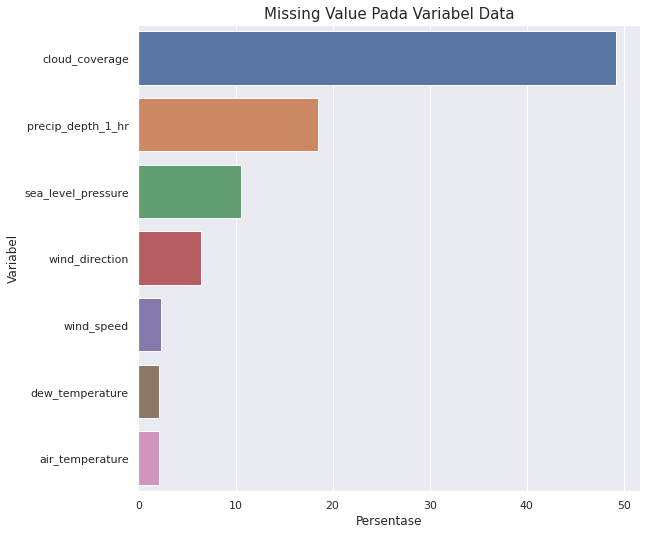

In [ ]:
# Visualisasi missing value
plt.figure(figsize=(8,8))
sns.barplot(x = m_values['Presentase Missing Values'], y = m_values.index).set_title("Missing Value Pada Variabel Data", fontsize=15)
plt.xlabel('Persentase', fontsize=12)
plt.ylabel('Variabel', fontsize=12)
plt.show()

In [ ]:
#Statistika deskriptif
D2train.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1048575.0,1048575.0,1048575,1.048575e+06,1048575.0,1048575,1.048575e+06,1.026132e+06,533010.000000,1.026079e+06,854878.000000,937636.000000,980637.000000,1.024586e+06
unique,1430.0,4.0,457,NaN,16.0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1249.0,0.0,2016-01-19 20:00:00,NaN,13.0,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1828.0,632416.0,2309,NaN,140720.0,421978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-01-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.332694e+03,NaN,NaN,1.079391e+05,3.225468e+00,1.769138,-2.679109e+00,0.564369,1016.966410,183.298737,3.494426e+00
std,NaN,NaN,NaN,6.468032e+04,NaN,NaN,1.170413e+05,9.524387e+00,2.591556,9.687170e+00,5.134044,9.286851,119.370288,2.432883e+00
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,2.830000e+02,-2.560000e+01,0.000000,-2.940000e+01,-1.000000,974.400000,0.000000,0.000000e+00
25%,NaN,NaN,NaN,1.290000e+01,NaN,NaN,3.276600e+04,-2.800000e+00,0.000000,-9.000000e+00,0.000000,1011.800000,80.000000,2.100000e+00


In [ ]:
D2train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.000,0,Education,7432,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.000,0,Education,2720,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.000,0,Education,5376,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.000,0,Education,23685,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.000,0,Education,116607,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1323,3,2016-01-20,2815.150,14,Office,87200,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
1048571,1324,0,2016-01-20,14.000,14,Entertainment/public assembly,84688,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
1048572,1324,1,2016-01-20,0.000,14,Entertainment/public assembly,84688,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
1048573,1324,3,2016-01-20,575.662,14,Entertainment/public assembly,84688,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7


In [ ]:
# Mengganti semua missing value dengan median masing2 kolom
median = D2train.median()
D2train = D2train.replace(np.nan, median)
D2train.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

In [ ]:
D2train

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.000,0,Education,7432,25.0,6.0,20.0,0.0,1019.7,0.0,0.0
1,1,0,2016-01-01,0.000,0,Education,2720,25.0,6.0,20.0,0.0,1019.7,0.0,0.0
2,2,0,2016-01-01,0.000,0,Education,5376,25.0,6.0,20.0,0.0,1019.7,0.0,0.0
3,3,0,2016-01-01,0.000,0,Education,23685,25.0,6.0,20.0,0.0,1019.7,0.0,0.0
4,4,0,2016-01-01,0.000,0,Education,116607,25.0,6.0,20.0,0.0,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1323,3,2016-01-20,2815.150,14,Office,87200,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
1048571,1324,0,2016-01-20,14.000,14,Entertainment/public assembly,84688,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
1048572,1324,1,2016-01-20,0.000,14,Entertainment/public assembly,84688,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7
1048573,1324,3,2016-01-20,575.662,14,Entertainment/public assembly,84688,-3.9,0.0,-14.4,0.0,1020.0,290.0,6.7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


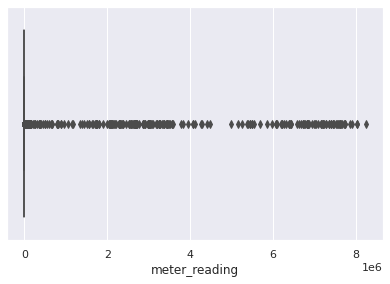

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


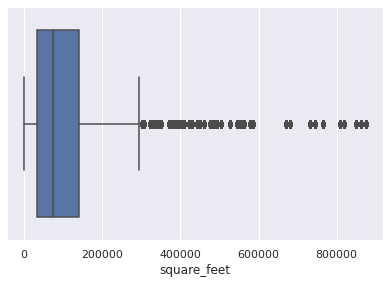

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


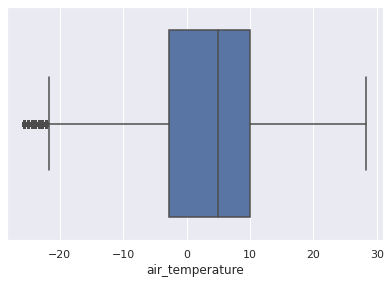

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


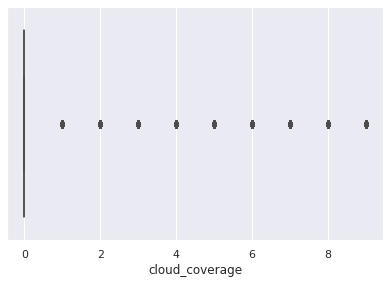

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


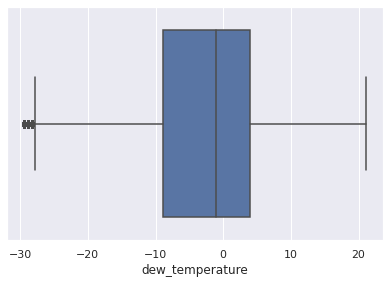

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


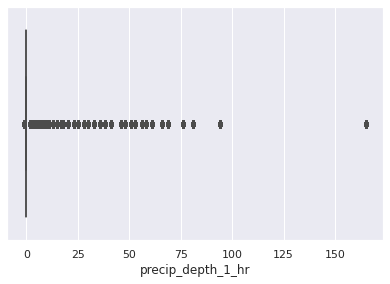

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


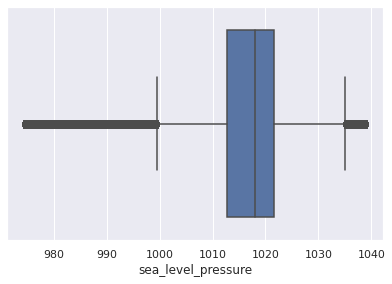

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


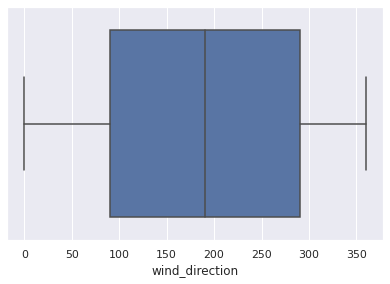

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


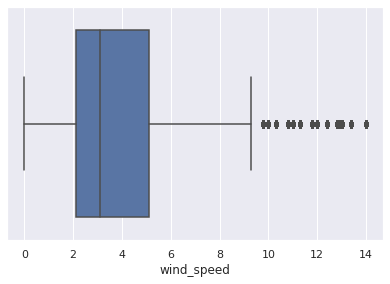

In [ ]:
#outliers
kolom = D2train.columns.values
for i in kolom:
  if D2train[i].dtype=='float64'or D2train[i].dtype=='int64':
    sns.boxplot(D2train[i])
    plt.show()

Akan dilihat pada meter_reading, jenis apa yang mempunyai nilai jauh lebih besar dibanding yang lainnya yang menyebabkan outliers.

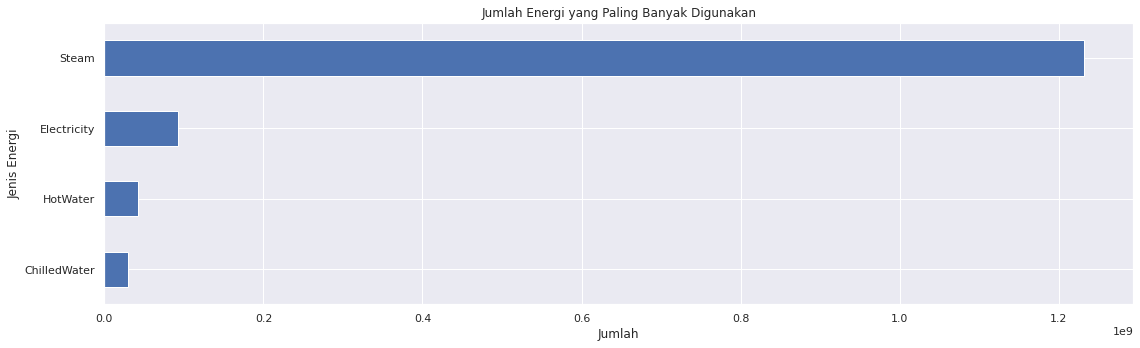

In [ ]:
# nilai yang besar (outliers) pada meter_reading disebabkan oleh energi Steam
plt.figure(figsize=(16,5))
tmp_df = D2train.groupby("meter").meter_reading.sum()
tmp_df.index = ['Electricity', 'ChilledWater', 'Steam', 'HotWater']
tmp_df.sort_values().plot(kind="barh")
plt.title("Jumlah Energi yang Paling Banyak Digunakan")
plt.xlabel("Jumlah")
plt.ylabel("Jenis Energi")
plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.show()

Dari visualisasi pada grafik, didapatkan bahwa jenis energi yang menyebabkan outliers adalah jenis energi steam karena jumlahnya sangat jauh daripada electricity, hotwater, dan chilledwater.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


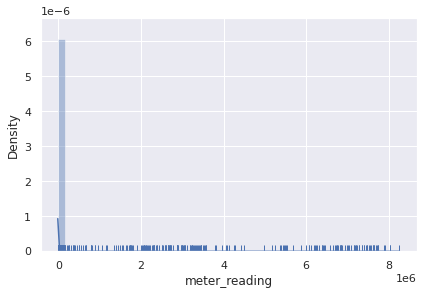

In [ ]:
# Akan dilihat distribusi meter_reading
plt.style.use('bmh'); sns.set() #style visualisasi
p = sns.distplot(D2train['meter_reading'], kde=True, rug=True)

Distribusi tidak normal (terlalu ke kiri) karena adanya outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


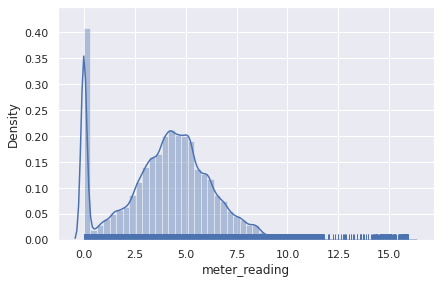

In [ ]:
# Untuk menormalkan distribusi akan dilakukan metode transformasi logaritma untuk mengurangi pengaruh outliers pada data
D2train['meter_reading']=np.log1p(D2train['meter_reading'])
p = sns.distplot(D2train['meter_reading'], kde=True, rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


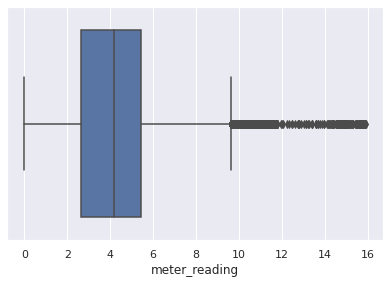

In [ ]:
sns.boxplot(D2train['meter_reading'])

Distribusi sudah berdistribusi dengan lebih normal walaupun masih terdapat banyak outliers.

In [ ]:
D2train.isna().sum()

building_id           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
primary_use           0
square_feet           0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64

# Visualisasi

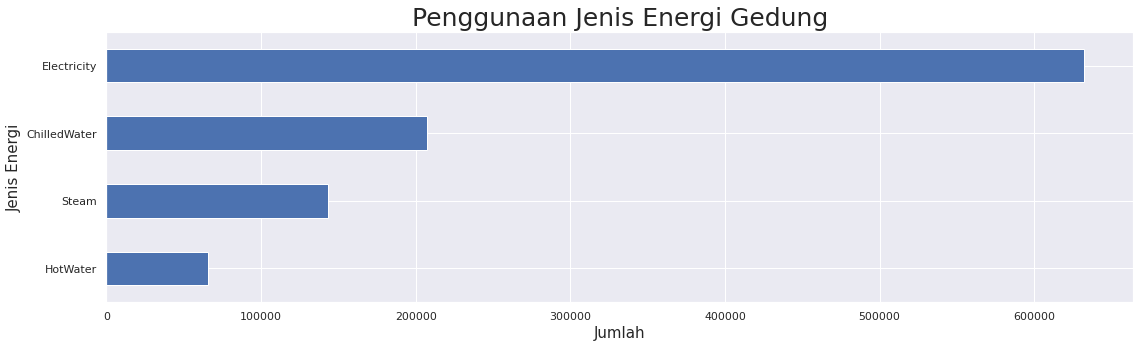

In [ ]:
# Melihat penggunaan energi terbanyak dengan plot
plt.figure(figsize=(16,5))
tmp_df = D2train.meter.value_counts()
tmp_df.index = ['Electricity', 'ChilledWater', 'Steam', 'HotWater']
tmp_df.sort_values().plot(kind="barh")
plt.title("Penggunaan Jenis Energi Gedung", size=25)
plt.xlabel("Jumlah", size=15)
plt.ylabel("Jenis Energi", size=15)
plt.tight_layout()
plt.show()

Energi Electricity adalah yang paling banyak digunakan pada gedung-gedung

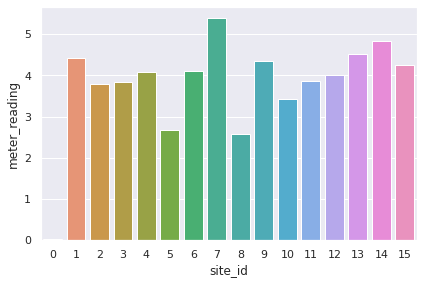

In [ ]:
# Melihat rata-rata penggunaan energi tiap site setelah outliers dihapus
D2train_site = D2train.groupby('site_id').meter_reading.mean().reset_index()
sns.barplot(x='site_id',y='meter_reading',data = D2train_site)

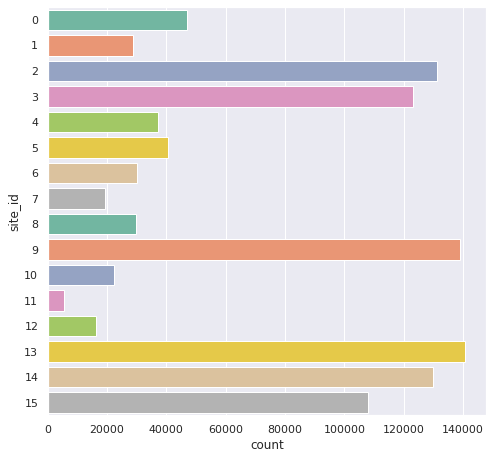

In [ ]:
# Sebaran site_id
plt.figure(figsize=(7,7))
sns.countplot(y= D2train.site_id,palette="Set2")

Site_id 9 dan 13 mempunyai jumlah gedung paling banyak dengan site_id 11 mempunyai jumlah gedung paling sedikit

Text(0.5, 1.0, 'Aktivitas Pemakaian Gedung')

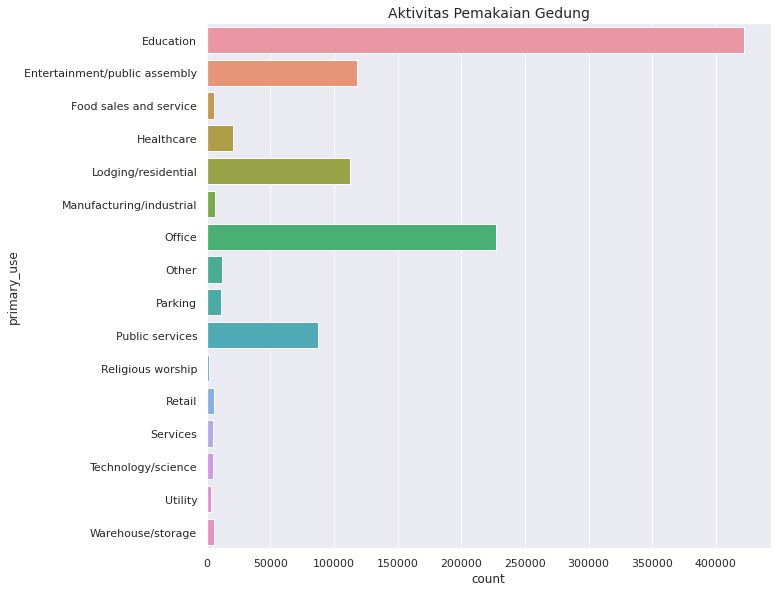

In [ ]:
# Sebaran aktivitas pemakaian gedung
fig,ax = plt.subplots(figsize=(9,9))
sns.countplot(y='primary_use', data=D2train).set_title('Aktivitas Pemakaian Gedung', fontsize=14)

Pemakaian gedung paling banyak digunakan untuk kegiatan akademik (education) dan pekerjaan kantor (office)

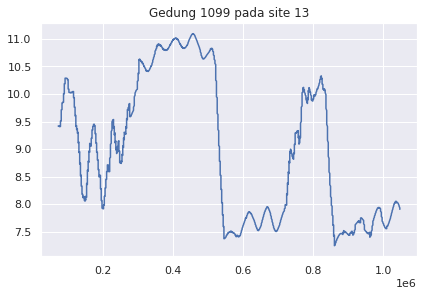

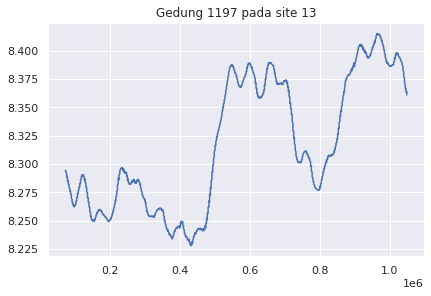

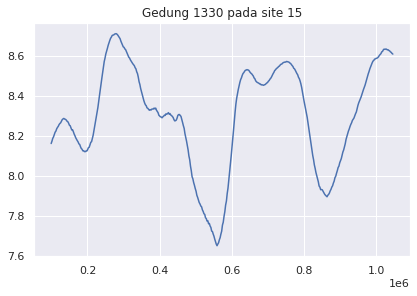

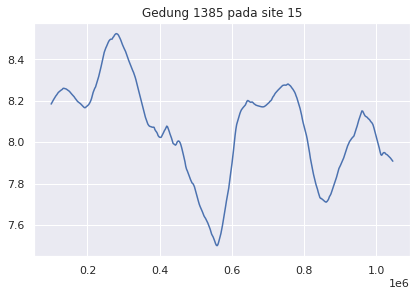

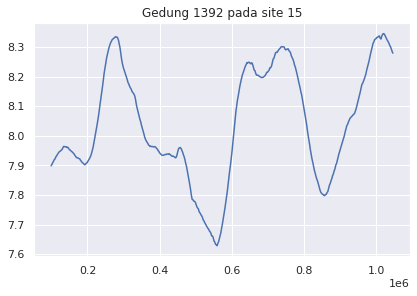

In [ ]:
# Visualisasi gedung dengan pemakaian energi terbesar setelah penghapusan outliers
ged = D2train.groupby("building_id")["meter_reading"].mean().sort_values(ascending = False).iloc[:5]
for value in ged.index:
    D2train[D2train["building_id"] == value]["meter_reading"].rolling(window = 24).mean().plot()
    plt.title('Gedung {} pada site {}'.format(value,D2train[D2train["building_id"] == value]["site_id"].unique()[0]))
    plt.show()

Gedung-gedung dengan pemakaian terbesar adalah nomor 1099, 1197, 1330, 1385, dan 1392 yang berada pada site 13 dan 15

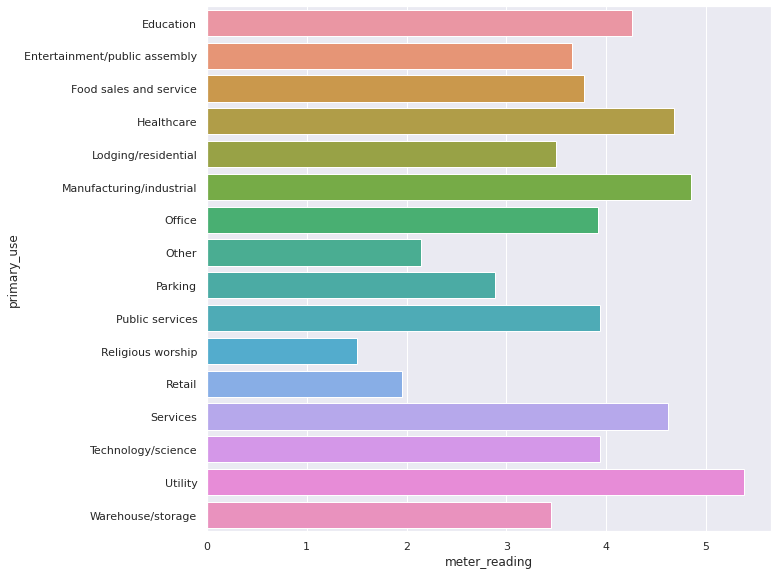

In [ ]:
# Rata-rata penggunaan energi tiap aktivitas
prim_use = D2train.groupby(['primary_use'])
prim_use = prim_use['meter_reading'].mean().reset_index()

fig,ax = plt.subplots(figsize=(9,9))
sns.barplot(x='meter_reading',y='primary_use',data = prim_use)

Penggunaan rata-rata terbanyak adalah untuk bangunan serbaguna (utility)

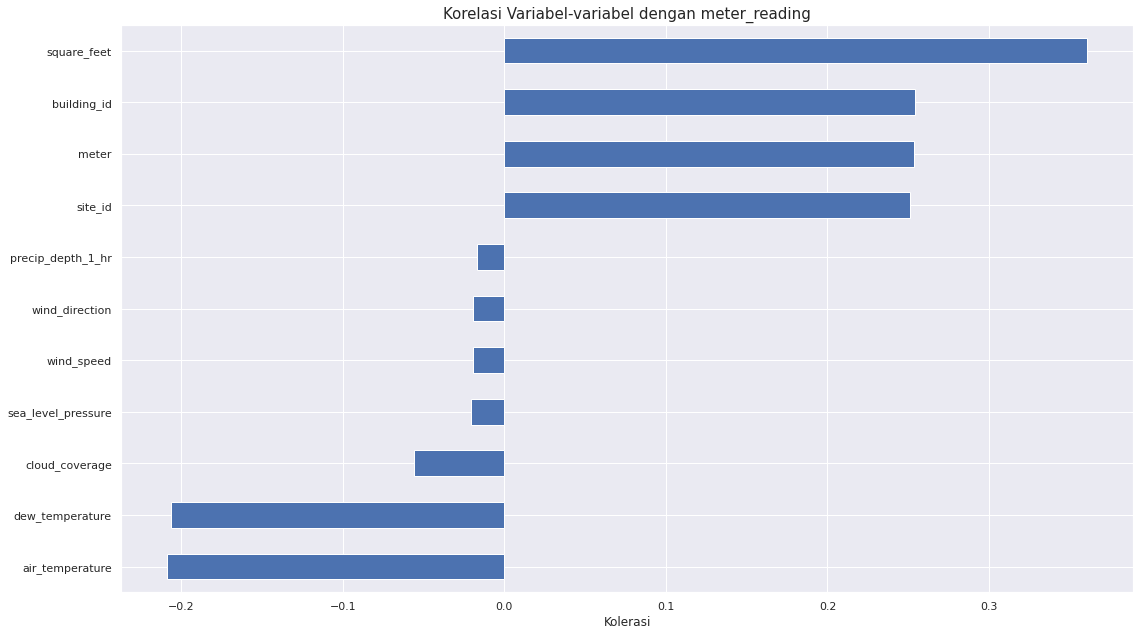

In [ ]:
# Korelasi variabel-variabel dengan meter_reading
corr_raw = D2train.sample(100_000).drop(["timestamp", "primary_use"], axis=1).astype(float)
corr = corr_raw.corr()
plt.figure(figsize=(16,9));
corr["meter_reading"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Korelasi Variabel-variabel dengan meter_reading", fontsize=15)
plt.xlabel("Kolerasi", fontsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sebaran Temperatur Udara')

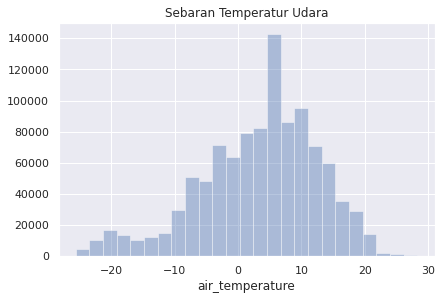

In [ ]:
# Sebaran temperatur udara
sns.distplot(D2train.air_temperature, bins=25, hist=True,
             kde=False, rug=False ).set_title("Sebaran Temperatur Udara")

dari grafik dapat dilihat bahwa sebagian besar sebaran temperatur udara pada gedung berada pada interval 0-10 derajat.

### HASIL PREPROCESSING

In [ ]:
D2train.to_csv('HASIL_PREPROCESSING.csv', index=False)